# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Import Data Science Libraries
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from datetime import datetime

# Import Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Requests
import requests
import json
import time
from pprint import pprint

# Import the open weather app API Key
from api_keys import weather_api_key

# Import Citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


In [8]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        if (response.status_code == 200 ):
            city_weather = response.json()
            
            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city = city_weather.get("name")
            city_country = city_weather.get('sys', {}).get('country')
            city_date = city_weather.get('dt')
            
            city_max_temp = city_weather.get('main', {}).get('temp_max')
            city_humidity = city_weather.get('main', {}).get('humidity')
            city_clouds = city_weather.get('clouds', {}).get('all')
            city_wind = city_weather.get('wind', {}).get('speed')


            city_lat = city_weather.get('coord', {}).get('lat')
            city_lng = city_weather.get('coord', {}).get('lon')
            
            # Append the City information into city_data list
            city_data.append({"City": city,
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})
        else:
            print(f"The API threw a non-200 status code: {response['status_code']} for city {city}") # error log
            print()            

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | greenville
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | luena
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | mombasa
Processing Record 7 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 8 of Set 1 | mbaiki
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | polyarnyy
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | hawaiian paradise park
Processing Record 13 of Set 1 | tolanaro
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | cabo san lucas
Processing Record 16 of Set 1 | west island
Processing Record 17 of Set 1 | dudinka
Processing Record 18 of Set 1 | isafjordur
Processing Record 19 of Set 1 | isle of lewis
City not found. Skipping...
Processing Record 20 of Set 1 | tadine
Processing Re

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [69]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [71]:
# Display sample data
city_data_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Greenville,35.6127,-77.3663,35.13,92,100,0.00,US,1733107207
1,Waitangi,-43.9535,-176.5597,57.81,75,86,11.01,NZ,1733107440
2,Luena,-11.7833,19.9167,60.67,93,13,1.36,AO,1733107441
3,George Town,5.4112,100.3354,84.13,69,20,8.05,MY,1733107442
4,Port-aux-Français,-49.3500,70.2167,38.48,78,98,7.11,TF,1733107443
...,...,...,...,...,...,...,...,...,...
588,Manaure,11.7751,-72.4445,82.09,80,65,15.12,CO,1733108194
589,Veigné,47.2856,0.7408,54.14,84,100,6.91,FR,1733108195
590,Puerto Colombia,10.9878,-74.9547,84.29,81,99,16.84,CO,1733108196
591,Geraldton,-28.7667,114.6000,72.01,53,75,18.41,AU,1733108197


In [73]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [75]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Greenville,35.6127,-77.3663,35.13,92,100,0.00,US,1733107207
1,Waitangi,-43.9535,-176.5597,57.81,75,86,11.01,NZ,1733107440
2,Luena,-11.7833,19.9167,60.67,93,13,1.36,AO,1733107441
3,George Town,5.4112,100.3354,84.13,69,20,8.05,MY,1733107442
4,Port-aux-Français,-49.3500,70.2167,38.48,78,98,7.11,TF,1733107443


In [77]:
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit='s')
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Greenville,35.6127,-77.3663,35.13,92,100,0.00,US,2024-12-02 02:40:07
1,Waitangi,-43.9535,-176.5597,57.81,75,86,11.01,NZ,2024-12-02 02:44:00
2,Luena,-11.7833,19.9167,60.67,93,13,1.36,AO,2024-12-02 02:44:01
3,George Town,5.4112,100.3354,84.13,69,20,8.05,MY,2024-12-02 02:44:02
4,Port-aux-Français,-49.3500,70.2167,38.48,78,98,7.11,TF,2024-12-02 02:44:03


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

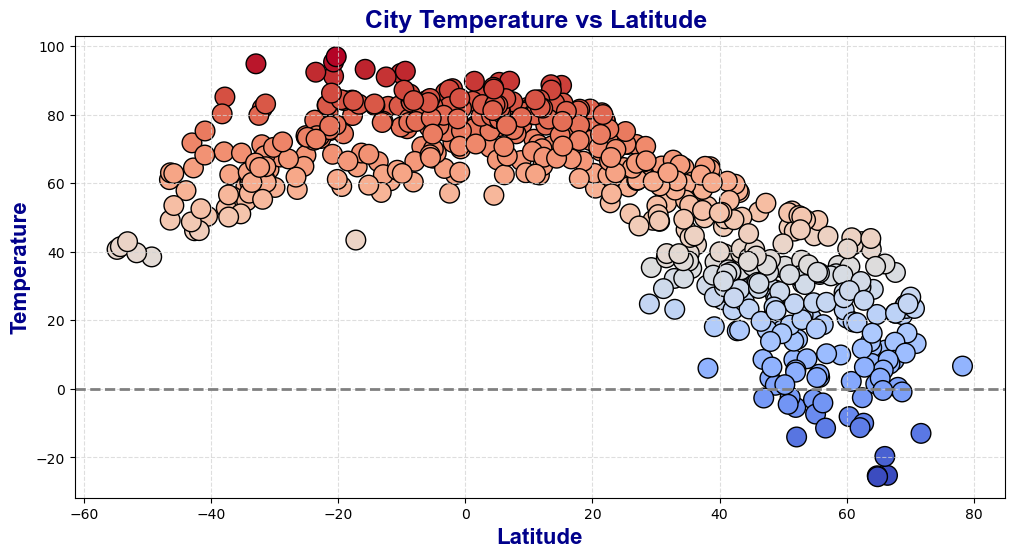

In [80]:
# Build scatter plot for latitude vs. temperature

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df["Max Temp"], c=city_data_df["Max Temp"], cmap="coolwarm", edgecolor="black", s=200)   

# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=16, fontweight="bold", color="darkblue")
plt.ylabel("Temperature", fontfamily="Arial", fontsize=16, fontweight="bold", color="darkblue")
plt.title(" City Temperature vs Latitude  ", fontweight="bold", fontsize=18, fontfamily="Arial", color="darkblue")

# Add a horizontal line at y=0 (for freezing point reference)
plt.axhline(0, color="grey", linewidth=2, linestyle="--")

plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

In [83]:
print(city_data_df["Humidity"].min())
print(city_data_df["Humidity"].max())


12
100


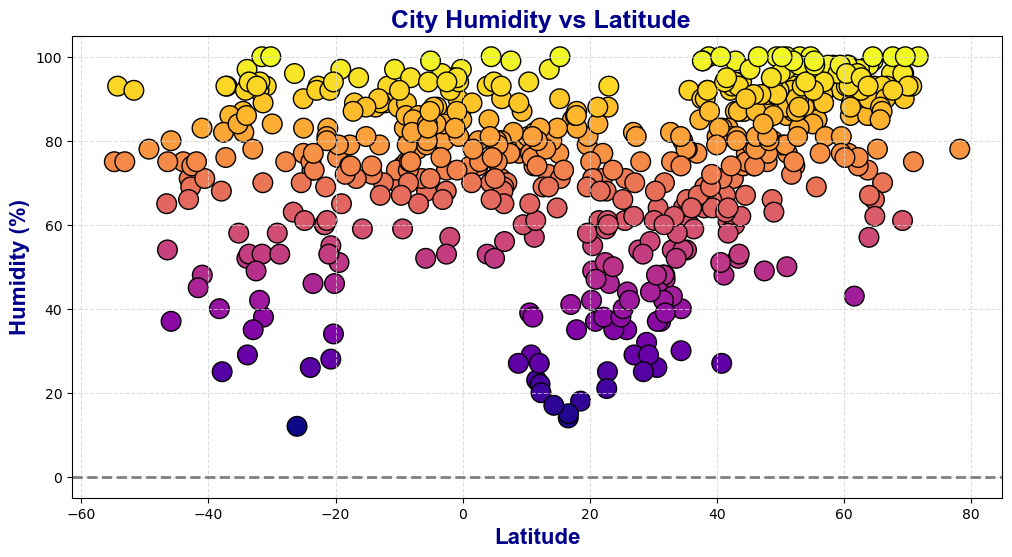

In [85]:
# Build scatter plot for latitude vs. Humidity

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], c=city_data_df["Humidity"],cmap="plasma", edgecolor="black", s=200)

# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=16, fontweight="bold", color="darkblue")
plt.ylabel("Humidity (%)", fontfamily="Arial", fontsize=16, fontweight="bold", color="darkblue")
plt.title(" City Humidity vs Latitude", fontweight="bold", fontsize=18, fontfamily="Arial", color="darkblue")

# Add a horizontal line at y=0 (for freezing point reference)
plt.axhline(0, color="grey", linewidth=2, linestyle="--")

plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

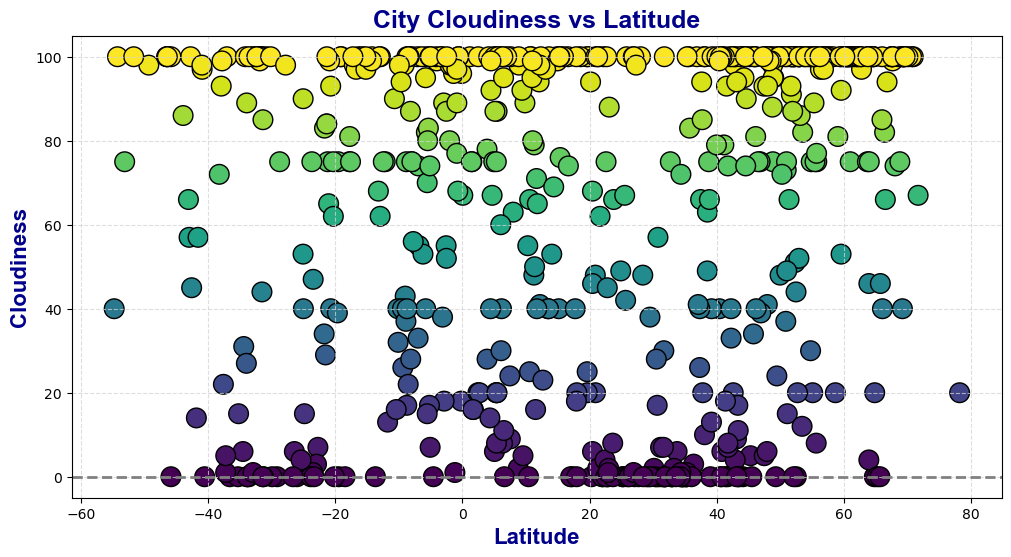

In [88]:
# Build the scatter plots for latitude vs. cloudiness
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], c=city_data_df["Cloudiness"],cmap="viridis", edgecolor="black", s=200)

# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=16, fontweight="bold", color="darkblue")
plt.ylabel("Cloudiness", fontfamily="Arial", fontsize=16, fontweight="bold", color="darkblue")
plt.title(" City Cloudiness vs Latitude ", fontweight="bold", fontsize=18, fontfamily="Arial", color="darkblue")

# Add a horizontal line at y=0 (for freezing point reference)
plt.axhline(0, color="grey", linewidth=2, linestyle="--")

plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [91]:
print(city_data_df["Wind Speed"].min())
print(city_data_df["Wind Speed"].max())

0.0
49.57


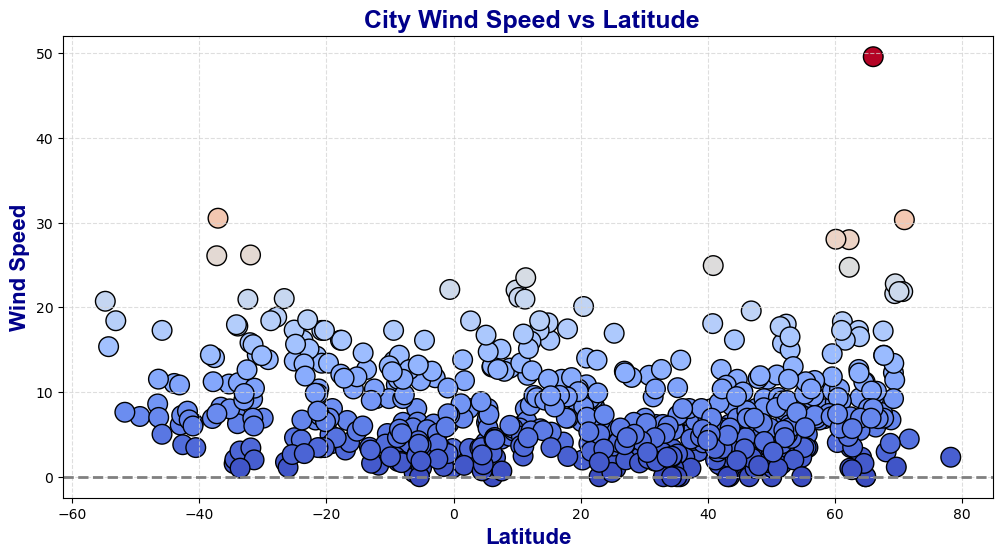

In [93]:
# Build the scatter plots for latitude vs. wind speed
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],c=city_data_df["Wind Speed"], cmap="coolwarm", edgecolor="black", s=200)

# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=16, fontweight="bold", color="darkblue")
plt.ylabel("Wind Speed", fontfamily="Arial", fontsize=16, fontweight="bold", color="darkblue")
plt.title(" City Wind Speed vs Latitude", fontweight="bold", fontsize=18, fontfamily="Arial", color="darkblue")

# Add a horizontal line at y=0 (for freezing point reference)
plt.axhline(0, color="grey", linewidth=2, linestyle="--")

plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [141]:
# Define a function to create Linear Regression plots

def do_regression_plot(x_values, y_values, x_label, y_label, annotation):  
    # do regression
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    r_squared = rvalue**2
    regress_values = x_values * slope + intercept # these are the points/predictions
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"Correlation Coefficient (r): {rvalue}")
    print(f"R^2 Value: {r_squared}")
    print(f"Equation of the Line: {line_eq}")
    # Change Canvas Size
    plt.figure(figsize=(12, 6))
    
    # Create a basic plot
    plt.scatter(x_values, y_values, color="#DB5461", edgecolor="black", s=200)
    plt.plot(x_values, regress_values, color="black", linewidth=6) # the regression line

    # Add Labels/Title
    plt.xlabel(x_label, fontfamily="Arial", fontsize=14)
    plt.ylabel(y_label, fontfamily="Arial", fontsize=14)
    plt.title(f"{x_label} vs {y_label}", fontweight="bold", fontsize=18, fontfamily="Arial")
    
    # Add in a background grid
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    
    # Annotate
    plt.annotate(line_eq, annotation, fontsize=15, color="black")
    
    # Show/Save the Graph
    plt.show()

In [143]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df.Lat >= 0].reset_index(drop=True)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Greenville,35.6127,-77.3663,35.13,92,100,0.00,US,2024-12-02 02:40:07
1,George Town,5.4112,100.3354,84.13,69,20,8.05,MY,2024-12-02 02:44:02
2,Mbaïki,3.8678,17.9892,70.43,53,28,2.01,CF,2024-12-02 02:44:07
3,Polyarny,69.1989,33.4478,24.40,96,100,12.28,RU,2024-12-02 02:44:09
4,Albany,42.6001,-73.9662,26.35,71,20,1.01,US,2024-12-02 02:43:03


In [145]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df.Lat < 0].reset_index(drop=True)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Waitangi,-43.9535,-176.5597,57.81,75,86,11.01,NZ,2024-12-02 02:44:00
1,Luena,-11.7833,19.9167,60.67,93,13,1.36,AO,2024-12-02 02:44:01
2,Port-aux-Français,-49.3500,70.2167,38.48,78,98,7.11,TF,2024-12-02 02:44:03
3,Mombasa,-4.0547,39.6636,75.85,88,99,4.25,KE,2024-12-02 02:44:05
4,Ushuaia,-54.8000,-68.3000,40.66,75,40,20.71,AR,2024-12-02 02:39:15


###  Temperature vs. Latitude Linear Regression Plot

Correlation Coefficient (r): -0.8577240036244329
R^2 Value: 0.7356904663935262
Equation of the Line: y = -1.17x + 89.2


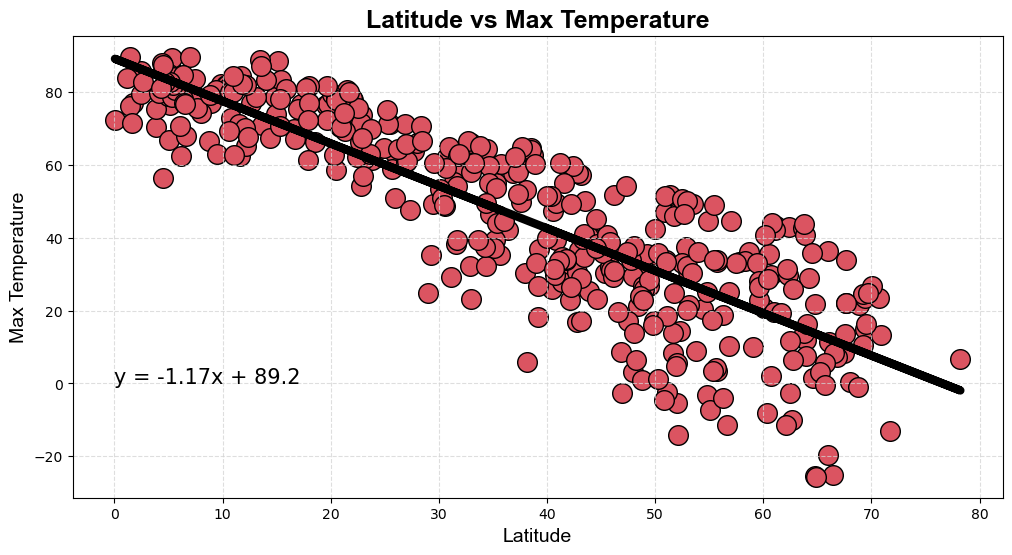

In [148]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temperature"
annotation = (0, 0)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)


Correlation Coefficient (r): 0.588482622737138
R^2 Value: 0.34631179726358075
Equation of the Line: y = 0.51x + 81.74


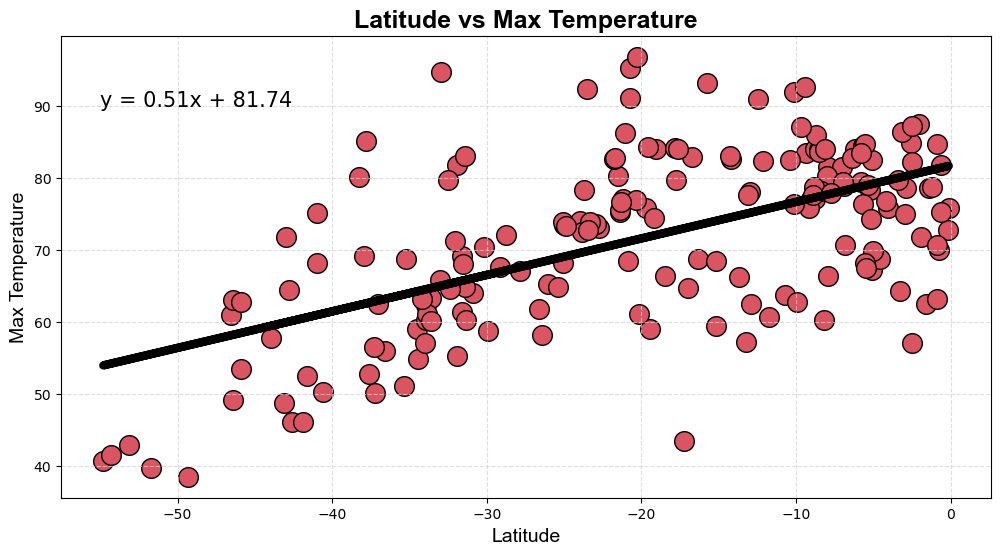

In [150]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temperature"
annotation = (-55,90)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** 
The correlation coefficient value of -0.85 tells that there is strong negative correlation between latitude and temperature in the nothern hemisphere. The slope of the regression line y = -1.17x + 89.2 shows that for every increase in the latitude,the temperature decreases by -1.17 many units. The r^2 indicates that 73.56% of the variation in temperature is due to latitude.
The correlation coefficient value of 0.58 in the sothern hemisphere indicates moderate positive correlation between latitude and temperature . The slope of the regression line y = 0.51x + 81.74 means that for every increase in the latitude, the temperature increases by 0.51 units. The value of r^2 indicates 34.63 % of the variation in temperature is due to latitude.

### Humidity vs. Latitude Linear Regression Plot

Correlation Coefficient (r): 0.4207570904845577
R^2 Value: 0.1770365291930303
Equation of the Line: y = 0.42x + 59.52


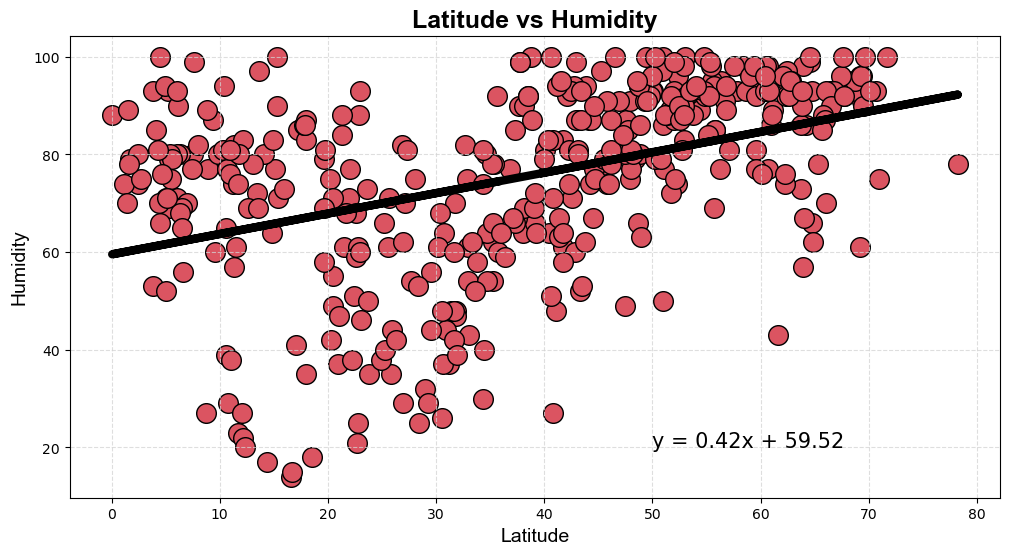

In [154]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
annotation = (50,20)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

Correlation Coefficient (r): 0.2407483460531081
R^2 Value: 0.05795976612730709
Equation of the Line: y = 0.29x + 81.13


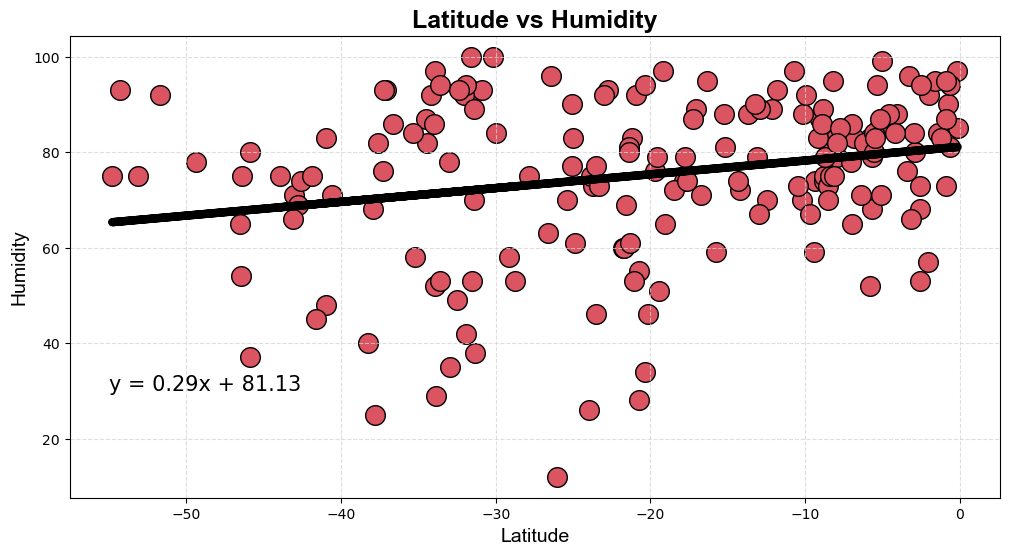

In [156]:
 # Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
annotation = (-55,30)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** 
The value of Correlation coefficient of 0.4207 indicates a weak positive correlation between latitude and humidity in the northern hemisphere. There is a mild tendency for humidity to increase as latitude increases. The value of r^2 0.1770 means that the linear model does not fit the data well and there are likely other factors affecting humidity.
The value of Correlation coefficient of 0.2407 indicates a very weak positive correlation between latitude and humidity in the southern hemisphere. There is a very mild tendency for humidity to increase as latitude increases. The value of r^2 0.05795 shows a very low value, indicating that the model does not fit the data and there are likely other factors affecting humidity.


### Cloudiness vs. Latitude Linear Regression Plot

Correlation Coefficient (r): 0.2557071724656731
R^2 Value: 0.06538615805038948
Equation of the Line: y = 0.52x + 40.81


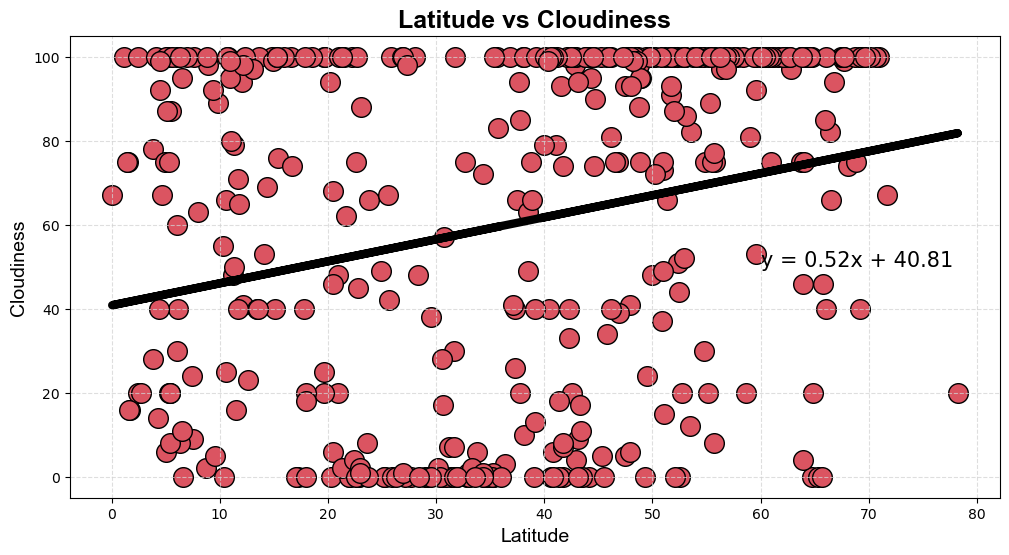

In [160]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
annotation = (60,50)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

Correlation Coefficient (r): 0.11014473280783549
R^2 Value: 0.012131862165309471
Equation of the Line: y = 0.29x + 68.27


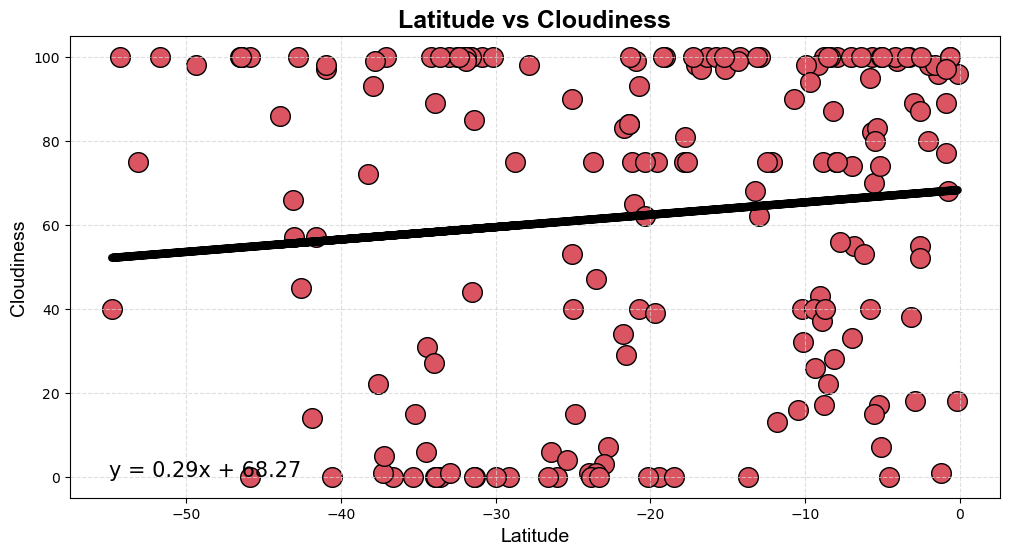

In [162]:
 # Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
annotation = (-55,0)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** 
The value of Correlation Coefficient (r): 0.2557 indicates a very weak positive correlation between latitude and cloudiness in northern hemisphere.The R2 value of 0.0653 suggests that the linear model explains that only 6.53% of the variance in cloudiness, meaning the model is a poor fit for the data. The remaining 93.5% of the variability in cloudiness is likely due to other factors.
The value of Correlation Coefficient (r): 0.1101 indicates a very weak positive correlation between latitude and cloudiness in southern hemisphere as well.The R2 value of 0.0121 suggests that the linear model explains only that 1.21% of the variance in cloudiness, meaning the model is a poor fit for the data. The remaining 98.8% of the variability in cloudiness is likely due to other factors.The equation y = 0.29x + 68.27 suggests a very weak positive relationship in southern hemisphere as well. 


### Wind Speed vs. Latitude Linear Regression Plot

Correlation Coefficient (r): 0.09807428018737818
R^2 Value: 0.00961856443427236
Equation of the Line: y = 0.03x + 6.32


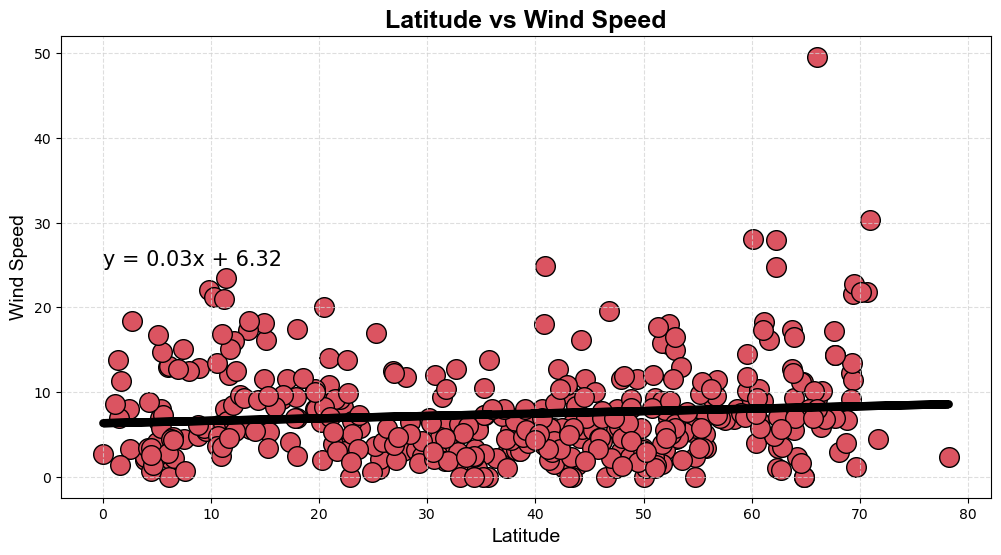

In [166]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
annotation = (0,25)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

Correlation Coefficient (r): -0.31418405529364163
R^2 Value: 0.09871162060075805
Equation of the Line: y = -0.13x + 6.08


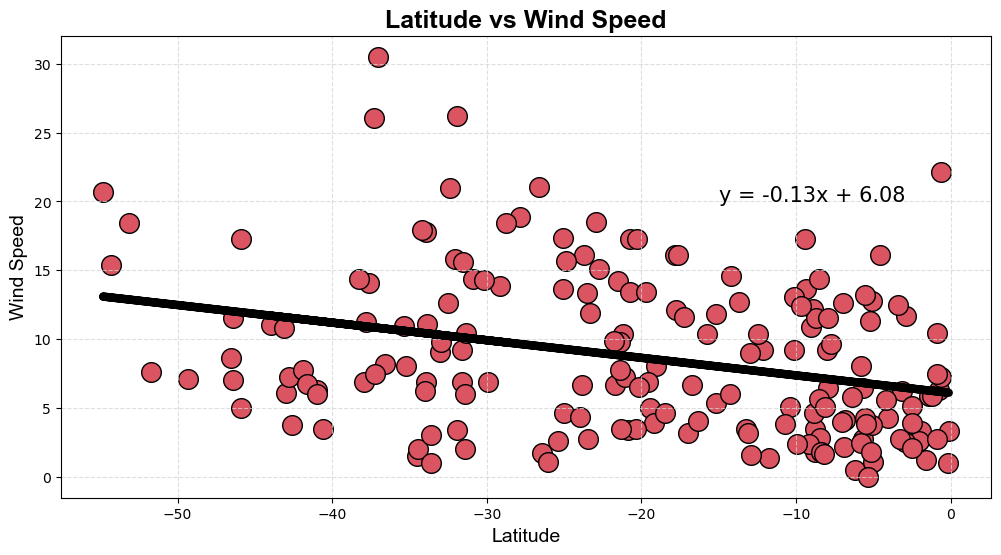

In [168]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
annotation = (-15,20)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:**  Both the Northern and Southern Hemisphere data show weak negative relationships between latitude and wind speed with the Southern Hemisphere showing a slightly stronger negative correlation.Both models have very low R2 values, indicating that the regression lines do not explain much of the variance in Wind Speed with the latitude.The negative slopes indicate a slight negative relationship between wind speed and latitude but this effect is very weak.